In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df1 = pd.read_csv("train.csv")
df1.head()
df1.shape

(891, 12)

In [3]:
df2 = pd.read_csv("test.csv")
df2.head()
df2.shape

(418, 11)

In [4]:
df = pd.concat([df1 ,df2], ignore_index=True)

In [5]:
df.to_csv("TITANIC DATASET_updated.csv")

# Data Cleaning :- 

In [6]:
# make a copy of your dataset
new_df = df.copy()

In [7]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Cleaning points :- 
- Remove passenger id
- Change dtypes of "Survived" ,"Pclass" ,"Sex" ,"Embarked" into the category data type
- fill missing values after the EDA
- Survived , Age , Cabin and Embarked col has missing values
- 

In [11]:
# remove passenger id col
df.drop(columns='PassengerId' , inplace=True)

In [12]:
# Change dtypes of "Survived" ,"Pclass" ,"Sex" ,"Embarked" into the category data type
df["Survived"] = df["Survived"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")

In [13]:
df.dtypes


Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object

### 1. Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

# Univariate analysis(On numerical col) :- 


### Age col

In [14]:
df["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

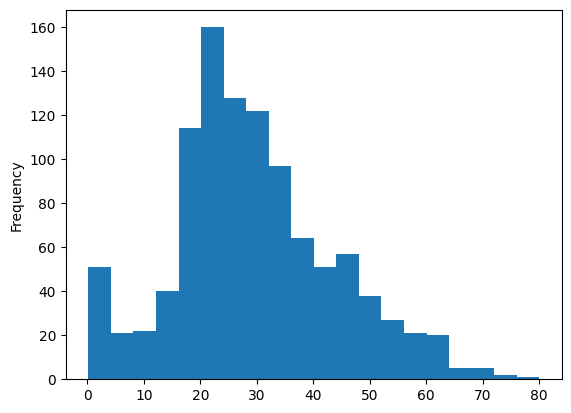

In [15]:
df["Age"].plot(kind = "hist" , bins = 20)

<Axes: ylabel='Density'>

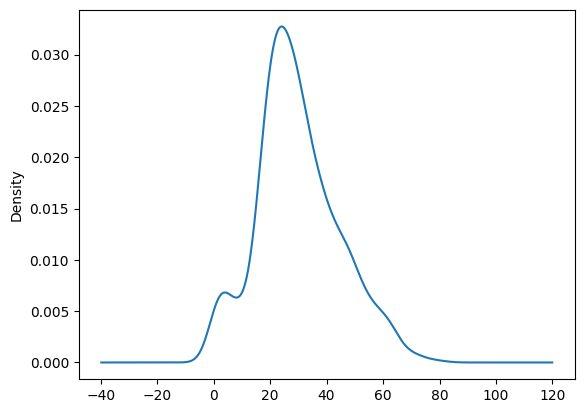

In [16]:
df["Age"].plot(kind = "kde" ) # it seem normal distribution 

In [17]:
df["Age"].skew() # it is very closed to the 0 and that's why is seems like a normal distribution which is good to analysis

0.40767455974362266

<Axes: >

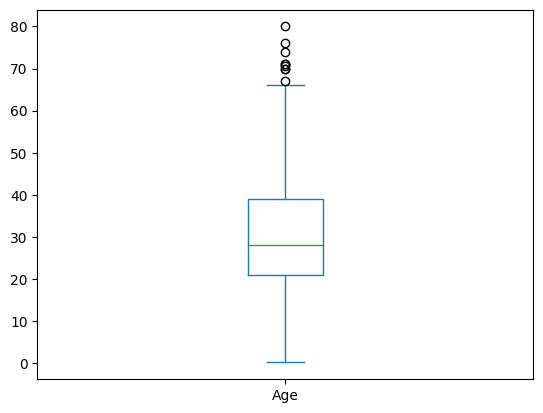

In [18]:
df["Age"].plot(kind = "box") # Age col is having outliers above 65

In [19]:
# checking the outliers 
df[df["Age"]>65]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,0.0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0.0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,0.0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,0.0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
972,NaN,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
987,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [20]:
df["Age"].isnull().sum() # there are 263 missing values i.e 20% missing values

263

In [21]:
(263/1309)*100

20.091673032849503

### Age

**conclusions :-** 

- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers

### Fare col

In [22]:
df["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

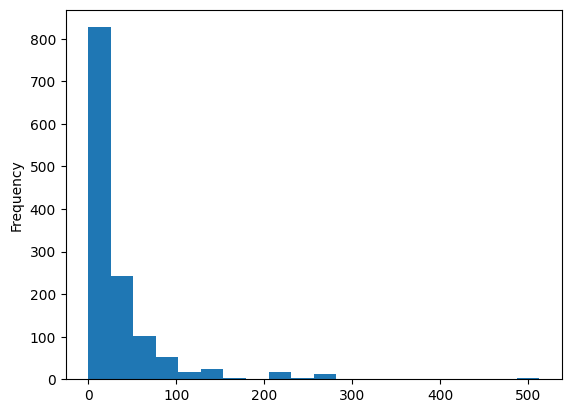

In [23]:
df["Fare"].plot(kind = "hist" , bins = 20)

<Axes: ylabel='Density'>

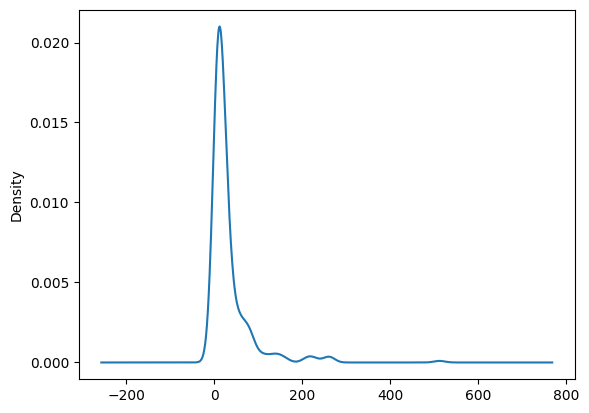

In [24]:
df["Fare"].plot(kind = "kde")

In [25]:
df["Fare"].skew() # this is highly positiveky skew 

4.367709134122922

<Axes: >

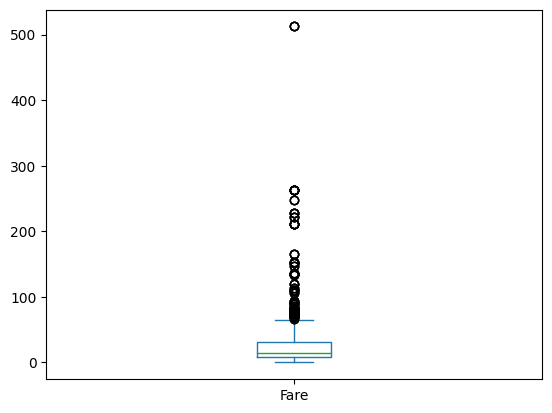

In [26]:
df["Fare"].plot(kind = "box")

In [27]:
df[df["Fare"]>200]
# in this few peoples are having the same ticket 
# i believe they will be travelling with the family 
# i need to extract indivitual fare of all the family members 
# for the same i need to make feature engineering on the fare col and need to make indivitual fare col

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,1.0,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,0.0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,1.0,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [28]:
df[df["Fare"].isnull()] # there is one missing value in Fare col

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


### Fare

**conclusions :-** 

- Age is high positively distributed
- there is 1 missing value
- There are some outliers
- in this few peoples are having the same ticket 
- i believe they will be travelling with the family 
- i need to extract indivitual fare of all the family members 
- for the same i need to make feature engineering on the fare col and need to make indivitual fare col

# Univariate analysis(On Categorical col) :-

### Categorical :- 
- Survived
- Pclass
- Sex 
- SibSp
- Parch
- Embarked

In [29]:
df["Survived"].value_counts()
# 0 ----> dead
# 1-----> Live person

0.0    549
1.0    342
Name: Survived, dtype: int64

<Axes: ylabel='Survived'>

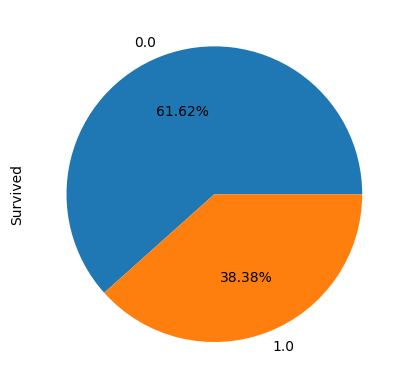

In [30]:
df["Survived"].value_counts().plot(kind = "pie" , autopct = "%0.2f%%")
# 62% (549) are dead
# 38% (342) are live 

<Axes: >

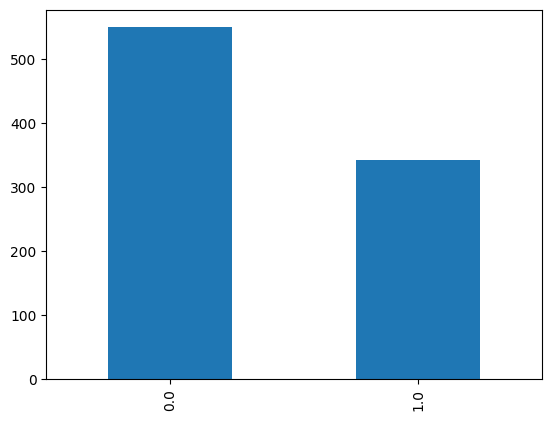

In [31]:
df["Survived"].value_counts().plot(kind = "bar")

In [32]:
df["Survived"].isnull().sum() 
# there are 418 missing values 

418

In [33]:
(418 /df.shape[0])*100

31.932773109243694

### Survived :- 
**Conclusions :-**
- 62% (549) are dead
- 38% (342) are live
- there are 418 missing values (32% missing values )
- 

### Pclass col

In [34]:
df["Pclass"].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<Axes: ylabel='Pclass'>

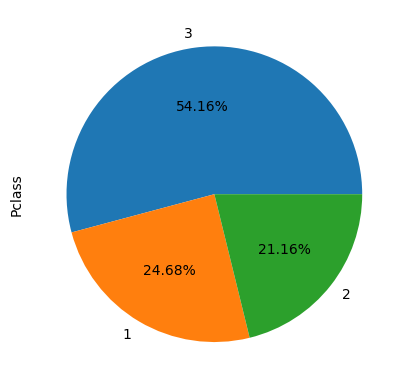

In [35]:
df["Pclass"].value_counts().plot(kind = "pie" , autopct = "%0.2f%%")
# 54% peoples are travelling in Pclass3 

<Axes: >

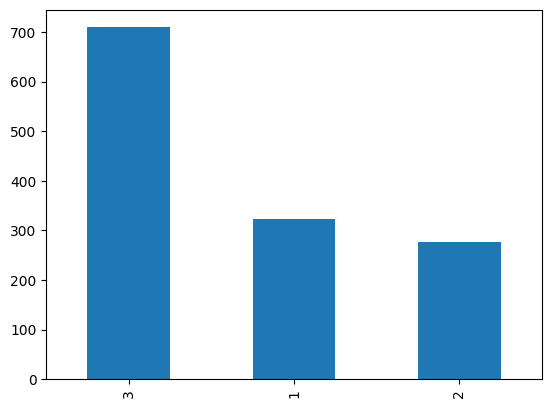

In [36]:
df["Pclass"].value_counts().plot(kind = "bar")

In [37]:
df["Pclass"].isnull().sum() 
# there is no any missing values 


0

### Pclass 
**Conclusion:-**
- 54% (709)peoples are travelling in Pclass3 

### Sex col

In [38]:
df["Sex"].value_counts()
# there are 843 males and 466 females
# count of male is higher than the females

male      843
female    466
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

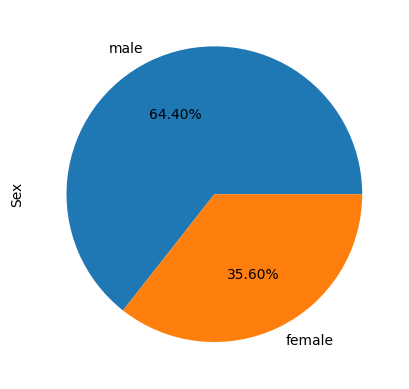

In [39]:
df["Sex"].value_counts().plot(kind = "pie" , autopct = "%0.2f%%")

<Axes: >

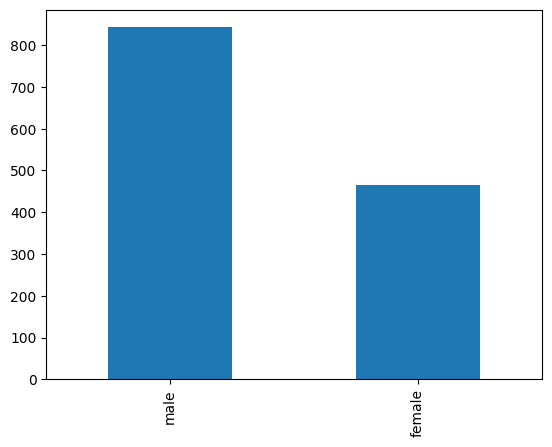

In [40]:
df["Sex"].value_counts().plot(kind = "bar")

In [41]:
df["Sex"].isnull().sum()
# there is no any missing values 


0

### Sex 
**Conclusions :-**
- there are more count of male as compare to females
  

### Embarked 

In [42]:
df["Embarked"].value_counts()
# S, C ,Q this all are the cities from where the passengers entered into the titanic 
# it was starting from the S and ends at the Q city

S    914
C    270
Q    123
Name: Embarked, dtype: int64

<Axes: ylabel='Embarked'>

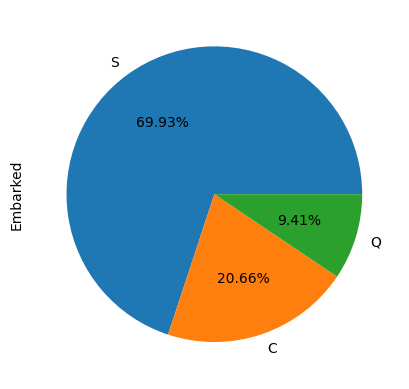

In [43]:
df["Embarked"].value_counts().plot(kind = "pie" , autopct = "%0.2f%%")
# more no.of peoples are entered into the titanic from the starting point i.e S city 

<Axes: >

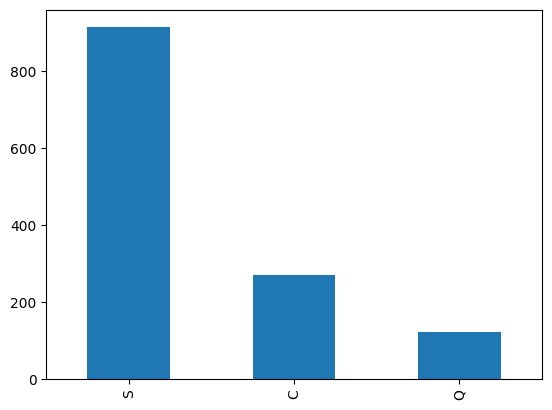

In [44]:
df["Embarked"].value_counts().plot(kind = "bar" )

In [45]:
df["Embarked"].isnull().sum()
# there are 2 missing values 

2

### Embarked 
**Conclusion :-**
- more no.of peoples are entered into the titanic from the starting point i.e S city
- there are 2 missing values 

In [46]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### SibSp and Parch

In [47]:
df["SibSp"].value_counts().sort_index(ascending = True)

0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: SibSp, dtype: int64

In [48]:
df["Parch"].value_counts().sort_index(ascending = True)

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: Parch, dtype: int64

<Axes: ylabel='SibSp'>

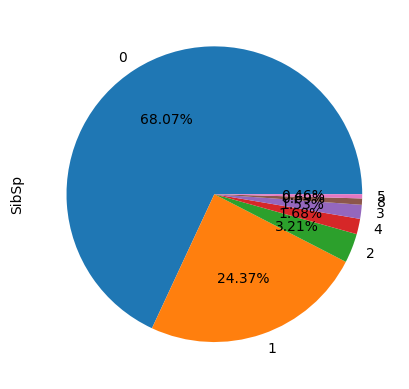

In [49]:
df["SibSp"].value_counts().plot(kind = "pie" , autopct = "%0.2f%%")

<Axes: ylabel='Parch'>

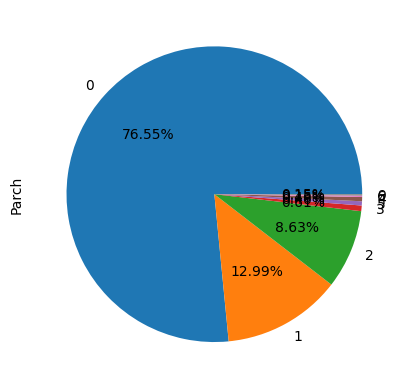

In [50]:
df["Parch"].value_counts().plot(kind = "pie" , autopct = "%0.2f%%")

### SibSp & Parch 
- These 2 col should be one coz both are showing the same info
- we should make feature engineering col named as(family_size)

# Bivariate analysis 
### `here my target col is Survived`

In [51]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Survived &	Pclass	

In [52]:
pd.crosstab(df["Survived"] , df["Pclass"])
#  The peoples who are in class 1 have more chance to survived as compared to both
#  The peoples who are in class 3 have more chance to died as compare to both 

Pclass,1,2,3
Survived,,,
0.0,80,97,372
1.0,136,87,119


In [53]:
pd.crosstab(df["Survived"] , df["Pclass"] ,normalize="columns")*100 # it will give me percentage of the col 


Pclass,1,2,3
Survived,,,
0.0,37.037037,52.717391,75.763747
1.0,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

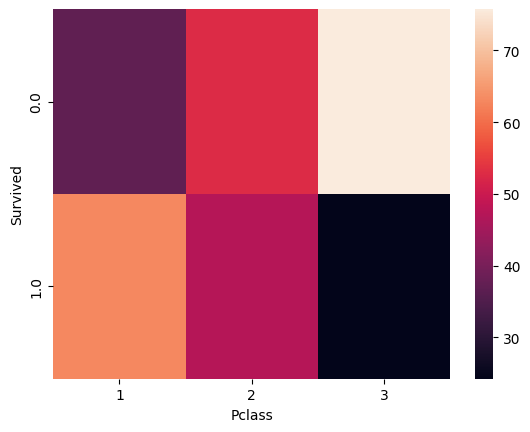

In [54]:
sns.heatmap(pd.crosstab(df["Survived"] , df["Pclass"] ,normalize="columns")*100)

### Survived & Pclass
**Conclusion :-**
- The peoples who are in class 1 have more chance to survived as compared to both
- The peoples who are in class 3 have more chance to died as compare to both

### Survived & Sex

In [55]:
pd.crosstab(df["Survived"] , df["Sex"] ,normalize="columns")*100
# if you are a female then u have more chance to live 
# if you are a male then u have more chance to dead

Sex,female,male
Survived,,
0.0,25.796178,81.109185
1.0,74.203822,18.890815


<Axes: xlabel='Survived'>

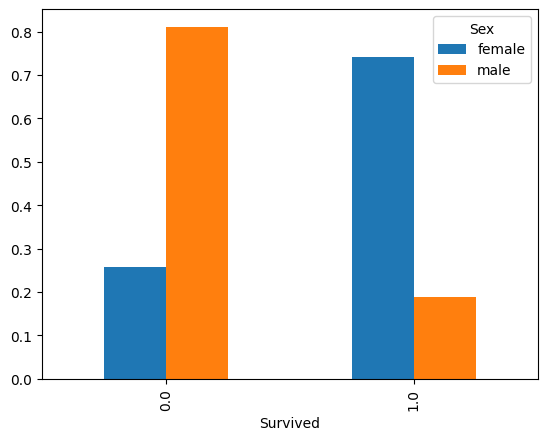

In [56]:
pd.crosstab(df["Survived"] , df["Sex"] ,normalize="columns").plot(kind = "bar")

<Axes: xlabel='Sex', ylabel='Survived'>

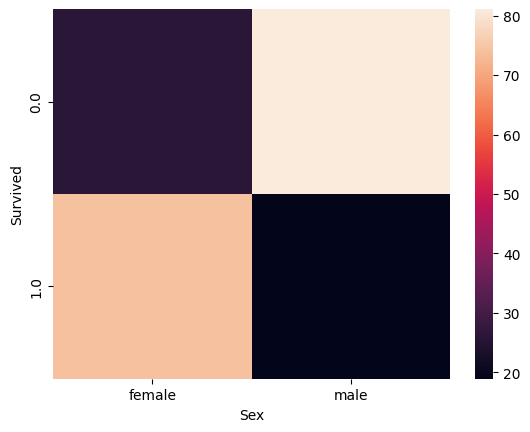

In [57]:
sns.heatmap(pd.crosstab(df["Survived"] , df["Sex"] ,normalize="columns")*100)

### Survived & Sex
**Conclusion:-**
- if you are a female then u have more chance to live 
- if you are a male then u have more chance to dead

### Survived & Embarked 

In [58]:
pd.crosstab(df["Survived"] , df["Embarked"] ,normalize="columns")*100

# if you are from C city then u have more chance to survived 
# if you are from the S city then more chance to dead

Embarked,C,Q,S
Survived,,,
0.0,44.642857,61.038961,66.304348
1.0,55.357143,38.961039,33.695652


In [59]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100
# in C city there are most of the peoples are travelling in class 1 and thats why more chance to survived

Embarked,C,Q,S
Pclass,,,
1,52.222222,2.439024,19.365427
2,10.370370,5.691057,26.477024
3,37.407407,91.869919,54.157549


### Conclusion : - 
- in C city there are most of the peoples are travelling in class 1 and thats why more chance to survived

### Survived and age 


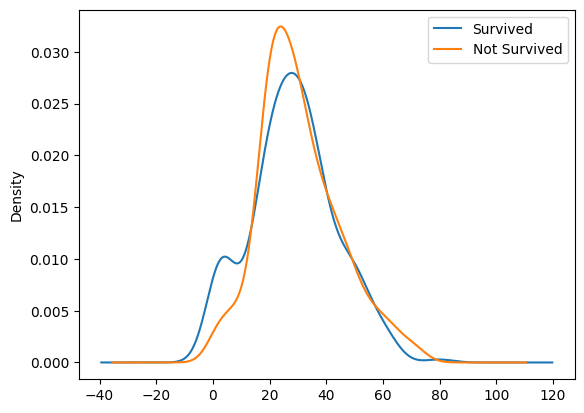

In [60]:

df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

# Feature engineering :- 

In [61]:
# we should make feature engineering col named as(family_size)
#df["family_size"] = df["SibSp"] + df["Parch"]+1

In [62]:
df.insert(4, "family_size" ,df["SibSp"] + df["Parch"]+1)

In [63]:
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):
    

    if num == 1:
        return 'alone'
    elif num>1 and num <5:
        return "small"
    else:
        return "large"

In [64]:
#df["family_type"] = df["family_size"].apply(transform_family_size)

In [65]:
df.insert(5,"family_type" ,df["family_size"].apply(transform_family_size))

In [66]:
#df["indivitual_fare ($)"] = df["Fare"]/df["family_size"]

In [67]:
df.insert(11,"indivitual_fare($)" ,df["Fare"]/df["family_size"])

In [68]:
df.head()

,Survived,Pclass,Name,Sex,family_size,family_type,Age,SibSp,Parch,Ticket,Fare,indivitual_fare($),Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,2,small,22.0,1,0,A/5 21171,7.2500,3.62500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,small,38.0,1,0,PC 17599,71.2833,35.64165,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,1,alone,26.0,0,0,STON/O2. 3101282,7.9250,7.92500,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,small,35.0,1,0,113803,53.1000,26.55000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,1,alone,35.0,0,0,373450,8.0500,8.05000,NaN,S


In [69]:
pd.crosstab(df["Survived"] ,df["family_type"] ,normalize="columns")*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


### Survived and family_type
- if you are alone ------> more chance to dead
- if you have large family then highest chance to dead 
- if you have small family then less chance to dead and more chance to survived 

# Mixed column :- 
### Name 

In [70]:
# i need to seperate surname and  title of that name 
# basically i need to make two columns 
# no need to keep main name of that person 


In [71]:
df["Name"]

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [72]:
surname = df["Name"].str.strip().str.split(",").str.get(0)

In [73]:
title = df["Name"].str.strip().str.split(",").str.get(1).str.strip().str.split(" ").str.get(0)

In [74]:
df.insert(2 ,"Title" , title)
df.insert(3 ,"SurName" , surname)

In [75]:
df.drop(columns="Name" ,inplace = True)

In [76]:
df["Title"].value_counts().index

Index(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Rev.', 'Dr.', 'Col.', 'Mlle.',
       'Major.', 'Ms.', 'Lady.', 'Sir.', 'Mme.', 'Don.', 'Capt.', 'the',
       'Jonkheer.', 'Dona.'],
      dtype='object')

In [77]:
df.loc[796 ,"Title"] ="Miss"

In [78]:
def change_title(title):
    if title == 'Mr.':
        return "Mr"
    elif title =="Miss.":
        return "Miss"
    elif title =='Mrs.':
        return "Miss"
    elif title =='Master.':
        return "Mr"
    elif title == 'Rev.':
        return "Mr"
    elif title == 'Col.':
        return "Mr"
    elif title =='Mlle.':
        return "Miss"
    elif title == 'Major.':
        return "Mr"
    elif title =='Ms.':
        return "Miss"
    elif title =='Lady.':
        return "Miss"
    elif title =='Sir.':
        return "Mr"
    elif title =='Mme.':
        return "Miss"
    elif title =='Don.':
        return "Mr"
    elif title =='Capt.':
        return "Mr"
    elif title =='the':
        return "Miss"
    elif title =='Jonkheer.':
        return "Mr"
    elif title =='Dona.':
        return "Miss"
    elif title =="Miss":
        return "Miss"
    elif title =="Dr.":
        return "Mr"
        

In [79]:
df["Title"] = df["Title"].apply(change_title)

In [80]:
df.head()

,Survived,Pclass,Title,SurName,Sex,family_size,family_type,Age,SibSp,Parch,Ticket,Fare,indivitual_fare($),Cabin,Embarked
0,0.0,3,Mr,Braund,male,2,small,22.0,1,0,A/5 21171,7.2500,3.62500,NaN,S
1,1.0,1,Miss,Cumings,female,2,small,38.0,1,0,PC 17599,71.2833,35.64165,C85,C
2,1.0,3,Miss,Heikkinen,female,1,alone,26.0,0,0,STON/O2. 3101282,7.9250,7.92500,NaN,S
3,1.0,1,Miss,Futrelle,female,2,small,35.0,1,0,113803,53.1000,26.55000,C123,S
4,0.0,3,Mr,Allen,male,1,alone,35.0,0,0,373450,8.0500,8.05000,NaN,S


In [81]:
# Drop SibSp and Parch col 
df.drop(columns=["SibSp" ,"Parch"] , inplace = True)

In [82]:
df.sample(5)

,Survived,Pclass,Title,SurName,Sex,family_size,family_type,Age,Ticket,Fare,indivitual_fare($),Cabin,Embarked
164,0.0,3,Mr,Panula,male,6,large,1.0,3101295,39.6875,6.614583,NaN,S
568,0.0,3,Mr,Doharr,male,1,alone,NaN,2686,7.2292,7.229200,NaN,C
650,0.0,3,Mr,Mitkoff,male,1,alone,NaN,349221,7.8958,7.895800,NaN,S
505,0.0,1,Mr,Penasco y Castellana,male,2,small,18.0,PC 17758,108.9000,54.450000,C65,C
362,0.0,3,Miss,Barbara,female,2,small,45.0,2691,14.4542,7.227100,NaN,C


In [83]:
df["Cabin"].isnull().sum()

1014

In [84]:
df["Cabin"].fillna("Missing" ,inplace = True)

In [85]:
# using Cabin col i made one more new col which is deck
df["deck"] = df["Cabin"].str[0]

In [86]:
df["deck"].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: deck, dtype: int64

In [87]:
pd.crosstab(df['deck'],df['Survived'],normalize='index')*100

Survived,0.0,1.0
deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
M,70.014556,29.985444
T,100.000000,0.000000


<Axes: xlabel='deck'>

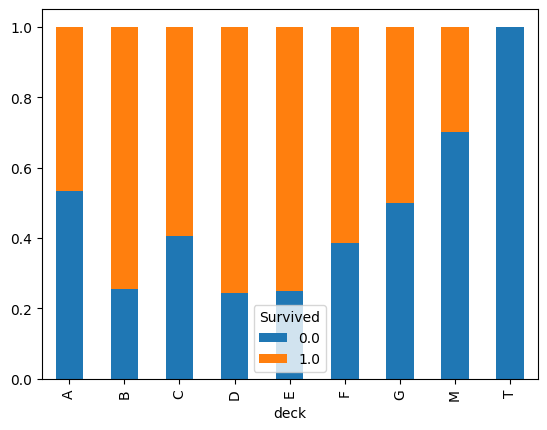

In [88]:
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

In [89]:
df.isnull().sum()

Survived              418
Pclass                  0
Title                   0
SurName                 0
Sex                     0
family_size             0
family_type             0
Age                   263
Ticket                  0
Fare                    1
indivitual_fare($)      1
Cabin                   0
Embarked                2
deck                    0
dtype: int64

In [90]:
# fill embarked missing values 
df[df["Embarked"].isnull()]

,Survived,Pclass,Title,SurName,Sex,family_size,family_type,Age,Ticket,Fare,indivitual_fare($),Cabin,Embarked,deck
61,1.0,1,Miss,Icard,female,1,alone,38.0,113572,80.0,80.0,B28,NaN,B
829,1.0,1,Miss,Stone,female,1,alone,62.0,113572,80.0,80.0,B28,NaN,B


- by our analysis with survived and embarked we can easily fill this two values 
- our analysis was , if that person is from city C then more chance to survived and that's why i am replacing embarked values
with the C

In [91]:
df["Embarked"].fillna("C" , inplace=True)

In [92]:
df[df["indivitual_fare($)"].isnull()]

,Survived,Pclass,Title,SurName,Sex,family_size,family_type,Age,Ticket,Fare,indivitual_fare($),Cabin,Embarked,deck
1043,NaN,3,Mr,Storey,male,1,alone,60.5,3701,NaN,NaN,Missing,S,M


In [93]:
df.loc[1043]

Survived                  NaN
Pclass                      3
Title                      Mr
SurName                Storey
Sex                      male
family_size                 1
family_type             alone
Age                      60.5
Ticket                   3701
Fare                      NaN
indivitual_fare($)        NaN
Cabin                 Missing
Embarked                    S
deck                        M
Name: 1043, dtype: object

In [94]:
df[(df["Pclass"] ==3)&(df["Age"] >=65)]

,Survived,Pclass,Title,SurName,Sex,family_size,family_type,Age,Ticket,Fare,indivitual_fare($),Cabin,Embarked,deck
116,0.0,3,Mr,Connors,male,1,alone,70.5,370369,7.750,7.750,Missing,Q,M
280,0.0,3,Mr,Duane,male,1,alone,65.0,336439,7.750,7.750,Missing,Q,M
851,0.0,3,Mr,Svensson,male,1,alone,74.0,347060,7.775,7.775,Missing,S,M


In [95]:
# i am taking the avg value of those three persons who is having Pclass =3 and Age >=65
# and that avg is 7.758
df["indivitual_fare($)"].fillna(7.758 , inplace = True)
df["Fare"].fillna(7.758 , inplace = True)

In [96]:
df["indivitual_fare($)"].isnull().sum()

0

In [97]:
df.isnull().sum()

Survived              418
Pclass                  0
Title                   0
SurName                 0
Sex                     0
family_size             0
family_type             0
Age                   263
Ticket                  0
Fare                    0
indivitual_fare($)      0
Cabin                   0
Embarked                0
deck                    0
dtype: int64

In [98]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [99]:
average_age_by_pclass = df.groupby('Pclass')['Age'].mean()

# Replace missing values in 'Age' with the corresponding average age based on 'Pclass'
df['Age'] = df.apply(lambda row: row['Age'] if pd.notna(row['Age']) else average_age_by_pclass[row['Pclass']], axis=1)

# Display the modified DataFrame


In [100]:
df.drop(columns="Cabin" ,inplace = True)

In [101]:
list(df.columns)

['Survived',
 'Pclass',
 'Title',
 'SurName',
 'Sex',
 'family_size',
 'family_type',
 'Age',
 'Ticket',
 'Fare',
 'indivitual_fare($)',
 'Embarked',
 'deck']

In [102]:
# here i have changed the order of column nothing else 
new_column_order = list(df.columns)
new_column_order[12], new_column_order[11] = new_column_order[11], new_column_order[12]

# Reorder the columns in the DataFrame based on their index
df = df[new_column_order]

In [103]:
df.head(15)

,Survived,Pclass,Title,SurName,Sex,family_size,family_type,Age,Ticket,Fare,indivitual_fare($),deck,Embarked
0,0.0,3,Mr,Braund,male,2,small,22.000000,A/5 21171,7.2500,3.625000,M,S
1,1.0,1,Miss,Cumings,female,2,small,38.000000,PC 17599,71.2833,35.641650,C,C
2,1.0,3,Miss,Heikkinen,female,1,alone,26.000000,STON/O2. 3101282,7.9250,7.925000,M,S
3,1.0,1,Miss,Futrelle,female,2,small,35.000000,113803,53.1000,26.550000,C,S
4,0.0,3,Mr,Allen,male,1,alone,35.000000,373450,8.0500,8.050000,M,S
5,0.0,3,Mr,Moran,male,1,alone,24.816367,330877,8.4583,8.458300,M,Q
6,0.0,1,Mr,McCarthy,male,1,alone,54.000000,17463,51.8625,51.862500,E,S
7,0.0,3,Mr,Palsson,male,5,large,2.000000,349909,21.0750,4.215000,M,S
8,1.0,3,Miss,Johnson,female,3,small,27.000000,347742,11.1333,3.711100,M,S
9,1.0,2,Miss,Nasser,female,2,small,14.000000,237736,30.0708,15.035400,M,C


In [104]:
df.isnull().sum()

Survived              418
Pclass                  0
Title                   0
SurName                 0
Sex                     0
family_size             0
family_type             0
Age                     0
Ticket                  0
Fare                    0
indivitual_fare($)      0
deck                    0
Embarked                0
dtype: int64

In [105]:
df.to_csv("TITANIC_EDA_DATASET.csv")

In [ ]:
https://github.com/mayurdalvi3003/PRODIGY_DS_Task2.git